# Confidence Interval of Population Mean, using `t.test()`

#### For better rendering of the LaTeX, view this in NB viewer at:  https://nbviewer.jupyter.org/github/dpshenoy/R_examples/blob/master/CI_with_t_test.ipynb

### Intro

This R notebook is a simple illustration of using `t.test()` to obtain a **100(1-$\alpha$)% CI** for a population mean.   Along the way I comment on some of the important assumptions to consider, before just blindly plugging a data set into `t.test( )`.

The data are minimum temperatures at MSP Airport on January 15 from 1930 to 2010, obtained from:  http://www.dnr.state.mn.us/climate/twin_cities/listings.html. See `./temperature_data/extractor.py` for more details.

In [1]:
# Read in the data
dat = read.csv('temperature_data/min_temps.txt',header=TRUE)

# take a peek at first few rows
head(dat)

year,minTemp
<int>,<int>
1930,-3
1931,10
1932,8
1933,28
1934,19
1935,-6


In [2]:
# take a peak at last few rows
tail(dat)

,year,minTemp
,<int>,<int>
75,2004,10
76,2005,-11
77,2006,30
78,2007,0
79,2008,-5
80,2009,-21


Consider `dat$minTemp` to be measurements $x_1,x_2,...,x_n$ that are a realization of random variables $X_1,X_2,...,X_n$.  We make two important assumptions about these random variables:


* **Important Assumption #1:**  $X_1,X_2,...,X_n$ are independent of each other.  We're not testing that here, we are taking it as a given, based on the nature of the data.


* **Important Assumption #2:**  $X_1,X_2,...,X_n$ all have the same probability distribution.  This we check with a few plots.


#### First, make a time plot:

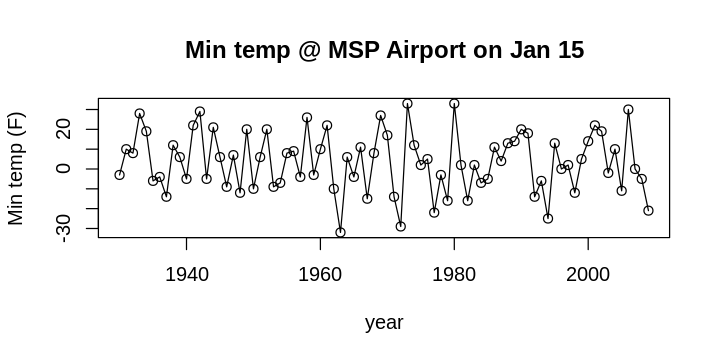

In [3]:
options(repr.plot.width=6, repr.plot.height=3)
plot(dat$year,dat$minTemp,type = 'o', xlab='year', ylab='Min temp (F)',main='Min temp @ MSP Airport on Jan 15')

There does not appear to be an obvious trend up or down, compared to the spread in values.  As for that spread itself, it does not seem to be shrinking or growing with time-- the jiggles up and down are about the same size over the whole time frame.  There's no obvious pattern such as a cycle going up or down over a decade or two.  So far it seems reasonable to assume these temperatures are realizations of a random sample $X_1,X_2,...,X_n$ from the same probability distribution.  

#### Next, examine some histograms and qq-plots

When histogramming, I play around with the number of bins and look for unimodality (single peak) vs. multi-modality, or some kind of skewing high or low, or any outliers (which the above plot also could have shown).  In the plots in the next cell, after playing around a bit with the `hist` function's `breaks` parameter and seeing no indication of multi-modality or skewing, I am letting R pick the number of bins for display purposes.  Next to each histogram is a q-q plot, which is a plot of the quantiles of each sample against those of a normal distribution.

Mean = 3.525 deg F; sd = 14.88774 deg F

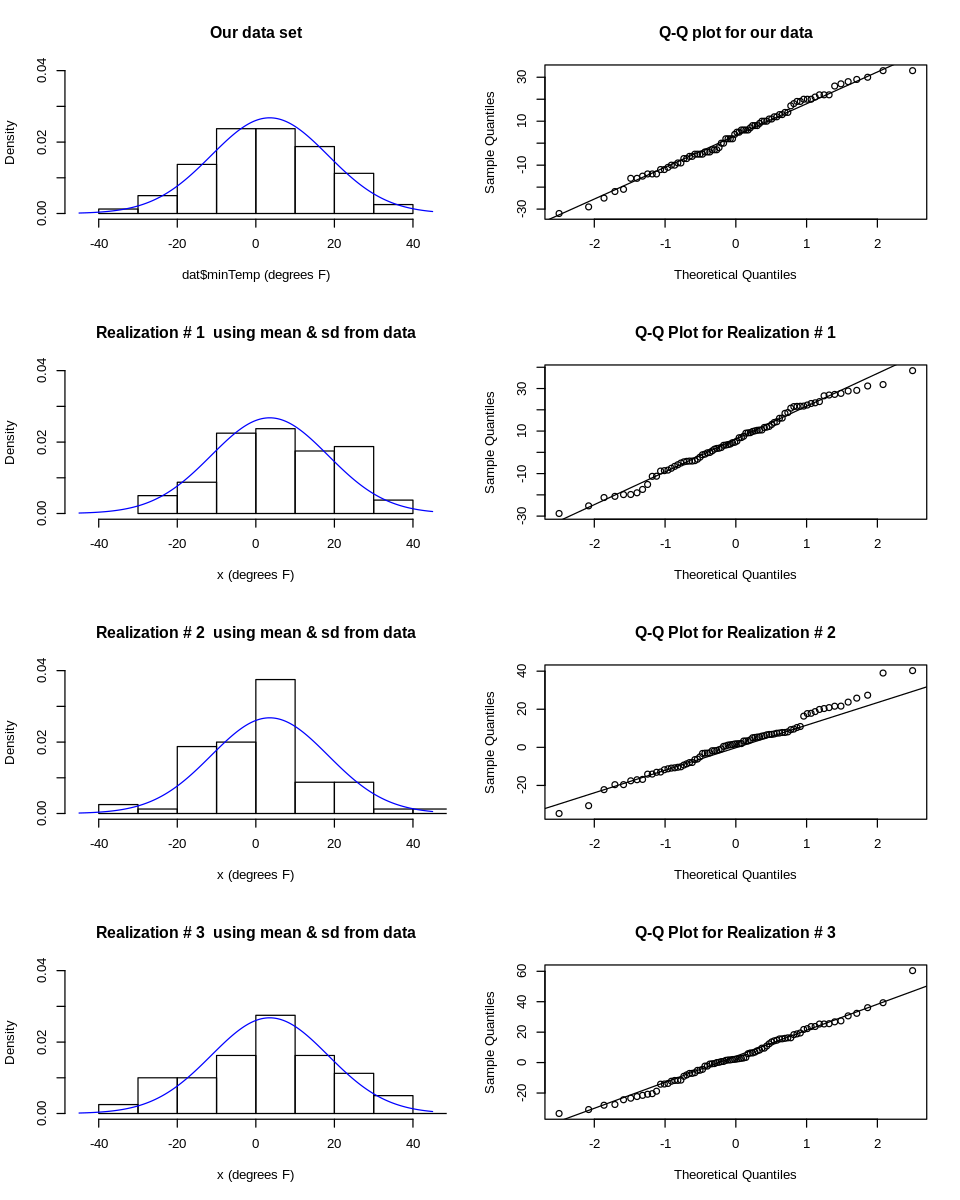

In [4]:
xlo = -45; xhi = 45 ; ylo = 0; yhi = 0.04
xlims = c(xlo,xhi) ; ylims = c(ylo,yhi)

# display the mean and sd of our sample
xbar = mean(dat$minTemp)
s = sd(dat$minTemp)

cat("Mean =",xbar,"deg F; sd =",s,"deg F")

# generate a normal dist with this mean and sd
x_seq = seq(xlo,xhi,0.5)
pdf = dnorm( x_seq, mean = xbar, sd = s )

# plot on a grid
options(repr.plot.width=8, repr.plot.height=10)
par(mfrow=c(4,2))

# The first histogram is our actual data, with normal pdf overlaid
hist(dat$minTemp,freq = FALSE, xlim = xlims,ylim = ylims,main='Our data set',xlab='dat$minTemp (degrees F)')
#par(new=TRUE)  # for overlaying pdf
lines(x_seq,pdf,type='l',col="blue",main='',xlab='',ylab='',xlim=xlims, ylim=ylims)

# qq-plot
qqnorm(dat$minTemp, main='Q-Q plot for our data')
qqline(dat$minTemp)

# The next 3 plots are other realizations from a normal dist with same mean and sd,
# using rnorm
for (i in 1:3){
    
    x = rnorm( nrow(dat), mean = xbar, sd = s )
    title = paste('Realization #',i,' using mean & sd from data')
    
    # plot histogram in 1st column
    hist(x, freq = FALSE, xlim = xlims,ylim = ylims,xlab='x (degrees F)',main=title)
    lines(x_seq,pdf,type='l',col="blue",main='',xlab='',ylab='',xlim=xlims, ylim=ylims)
    
    # Q-Q plot in 2nd column
    title = paste('Q-Q Plot for Realization #',i)
    qqnorm(x,main=title)
    qqline(x)
}

The top row is our data.  The histogram on the left is overlaid with a normal pdf made using the observed mean $\bar{x}$ and observed standard deviation $s$.  The other three histograms are random samples generated using `rnorm()` with the same $\bar{x}$ and $s$ supplied to that function as the mean and standard deviation.  The same pdf is overlaid on each.  Comparing our data's histogram to the ones below it, there does not seem to be strong visual evidence against the assumption that our temperature data are realizations of a random sample $X_1,X_2,...,X_n$ from the same normal distribution.  

The qq-plots accompanying each histogram support this view as well.  Comparing our data's `qqnorm()` plot (top right) against the others, it does not deviate noticeably from the theoretical quantiles of a normal distribution any more than any of the other random samples generated using `rnorm()`.  Therefore, we proceed with computing the **100(1-$\alpha$)% CI** for the observed mean.

The observed mean $\bar{x}$ is a realization of the random variable $\bar{X}$.  Change variables to the random variable $T$, with:

$$T = \frac{\bar{X}-\mu}{S/\sqrt{n}}$$

where $S$ is the standard deviation of $\bar{X}$.  (Our observed standard deviation $s = 14.9^\circ$ F is a realization of $S$, since $\bar{x}$ is a realization of $\bar{X}$).  This random variable $T$ follows the t-distribution with $\nu \equiv n - 1$ degrees of freedom (dof).  The **100(1-$\alpha$)% CI** is the interval around $T$ = 0 that contains 100(1-$\alpha$)% of the area under the t-distribution curve.  That is the area between the percentiles $-t_{1-\alpha/2,\nu}$ and $t_{1-\alpha/2,\nu}$ where:

$$t_{1-\alpha/2,\nu} = \mbox{qt}(1-\alpha/2,\nu)$$

The next plot illustrates this for a **95% CI ($\alpha$ = 0.05)**.  (With our sample size $n$ = 80, the t-distribution is essentially indistinguishable from the standard normal distribution.)

[1] "tlo =  -1.99045021023013 , thi =  1.99045021023013"


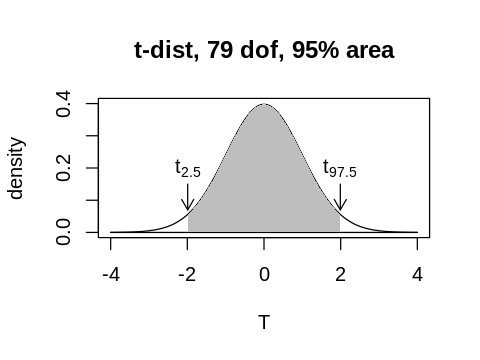

In [5]:
dof = length(dat$minTemp)-1    # of degrees of freedom for the t-distribution
a = 0.05  # for 95% CI   
Tlo = -4; Thi = 4; dT = 0.001 ; ylo = 0; yhi = 0.4
T = seq(Tlo,Thi,dT)  # T-axis plot points
t_dist = dt(T,dof)   # t-distribution
Tlims = c(Tlo,Thi); ylims = c(ylo,yhi)
t_legend = paste("t-dist, ",dof," dof, ",100*(1-a),"% area",sep="")

options(repr.plot.width=4, repr.plot.height=3)
plot(T,t_dist,type='l',lty=1,lwd=1,col='black',xlim=Tlims,ylim=ylims, ylab='density',main=t_legend)
lines( c(Tlo,Thi), c(0,0)  )     # zero-height line for clarity

# compute the percentiles 
thi = qt(1-a/2, dof)
tlo = -thi     # t-dist is symmetric
print(paste("tlo = ",tlo,", thi = ",thi))

# shade the area between tlo to thi with a polygon()
T.seg = c(tlo,thi,seq(thi,tlo,-dT) )         # T vertices
y.seg = c(  0,  0,dt(seq(thi,tlo,-dT),dof))  # y vertices
polygon(T.seg,y.seg,col='grey',lwd=0.01)

# add annotations of percentiles for this particular case (95% area)
text(tlo,0.2,expression('t'[2.5]))
text(thi,0.2,expression('t'[97.5]))
arrows(tlo,0.15,tlo,0.07,length = 0.1)
arrows(thi,0.15,thi,0.07,length = 0.1)

We can express the formula for the **100(1-$\alpha$)% CI** using the t-distribution to compute the probability that $\mu$ is between $-t_{1-\alpha/2,\nu}$ and $t_{1-\alpha/2,\nu}$:

$$
\begin{eqnarray}
100(1-\alpha)\% & = & P\left( -t_{1-\alpha/2,\nu} < T < t_{1-\alpha/2,\nu} \right) \\
                & = & P\left( -t_{1-\alpha/2,\nu} < \frac{\bar{X}-\mu}{S/\sqrt{n}} < t_{1-\alpha/2,\nu} \right) \\
                & = & P\left( -t_{1-\alpha/2,\nu}\frac{S}{\sqrt{n}} -\bar{X} < -\mu < t_{1-\alpha/2,\nu}\frac{S}{\sqrt{n}} -\bar{X} \right) \\
                & = & P\left( \bar{X} - t_{1-\alpha/2,\nu}\frac{S}{\sqrt{n}} < \mu < \bar{X} + t_{1-\alpha/2,\nu}\frac{S}{\sqrt{n}} -\bar{X} \right) \\
\end{eqnarray}
$$

This says there is a **100(1-$\alpha$)%** probability that $\mu$ is contained in the random interval:
$$\bar{X} \pm t_{1-\alpha/2,\nu}\frac{S}{\sqrt{n}}$$

Note that the previous sentence is a statement about the random variable $\bar{X}$, and *not* a statement about our 
realization of it, which is $\bar{x}$.

$\bar{X}$ and $S$ are realized when the data are collected.  With these realizations $\bar{x}$ and $s$, we can say that we are **100(1-$\alpha$)%** confident that $\mu$ is within the interval:

$$\bar{x} \pm t_{1-\alpha/2,\nu}\frac{s}{\sqrt{n}}$$

*Reminder*:  That is *not* the same as saying there is a 100(1-$\alpha$)% *probability* that $\mu$ is in this interval.  The *probability* that $\mu$ is in this interval is either 0 or 1.  This is because of the difference between the random variable $\bar{X}$ and our realization $\bar{x}$.  We have just our one realization, so the statement we can make is a percentage of how confident we are that $\mu$ is in this interval.  (If we are able to repeat this experiment many times, then 100(1-$\alpha$)% of the resulting intervals should contain $\mu$.)

*Relaxing the normal distribution assumption:*  If the $x_1,x_2,...,x_n$ are a realization of a random sample from *any* distribution (not specifically the normal distribution argued for with these temperature data), then so long as $n$ is sufficiently large (e.g., $n$ $\gtrapprox$ 30 for continuous distributions), we can say that we are *approximately* 100(1-$\alpha$)% confident that $\mu$ is in the interval stated above.

The value of the **100(1-$\alpha$)%** confidence interval can be computed using `qt()` to get the value of $t_{1-\alpha/2,\nu}$ and plugging in $\bar{x}$ and $s$ and $n$.  More convenient is the built-in `t.test()` function:

In [6]:
a = 0.05
t.test(dat$minTemp, conf.level = 1-a)


	One Sample t-test

data:  dat$minTemp
t = 2.1178, df = 79, p-value = 0.03734
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.2118948 6.8381052
sample estimates:
mean of x 
    3.525 


#### So in this example we are 95% confident that the mean temperature $\mu$ is in the range (0.2, 6.8) deg F. 

#### Or state it as:  we are 95% confident $\mu$ is in the interval covered by 3.5 $\pm$ 3.3 deg F.